In [ ]:
#Base
import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Disable Warnings
import warnings
warnings.filterwarnings("ignore")


#Machine learning Model
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Train-Test Split
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Grid Search
from sklearn.model_selection import GridSearchCV

#Save Model
import pickle
import requests
import json

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
#import dataset
df= pd.read_csv('/content/drive/MyDrive/DigitalSkola/Dataset2_House_Price.csv')

In [ ]:
#Menampilkan Datasset

df

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
...,...,...,...,...,...,...
9995,2009,1726,89,0,4,176425.9
9996,1990,44403,29,0,0,4448474.0
9997,2005,83841,3,1,9,8390030.5
9998,2010,59036,70,1,4,5905107.0


In [ ]:
#Check Missing Value Dan Tipe Data yang tidak sama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   made            10000 non-null  int64  
 1   squareMeters    10000 non-null  int64  
 2   numberOfRooms   10000 non-null  int64  
 3   hasStorageRoom  10000 non-null  int64  
 4   hasGuestRoom    10000 non-null  int64  
 5   price           10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
# Ubah semua kolom menjadi float
df = df.astype(float)

In [ ]:
#Check Missing Value Dan Tipe Data yang tidak sama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   made            10000 non-null  float64
 1   squareMeters    10000 non-null  float64
 2   numberOfRooms   10000 non-null  float64
 3   hasStorageRoom  10000 non-null  float64
 4   hasGuestRoom    10000 non-null  float64
 5   price           10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [ ]:
df_test=df.copy()

In [ ]:
df_test['pembagi']=df_test['price']/df_test['squareMeters']

In [ ]:
df_test.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price,pembagi
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06,100.466908
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06,2.089565
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04,100.004580
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06,100.072574
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06,100.130111
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06,100.256570
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07,160.785106


In [ ]:
# Memisahkan mana X dan mana y
y= df['price']
X= df.drop(['price'],1)
X.head()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,2005.0,75523.0,3.0,0.0,7.0
1,2015.0,80771.0,39.0,1.0,2.0
2,2021.0,55712.0,58.0,1.0,9.0
3,2012.0,32316.0,47.0,0.0,3.0
4,1990.0,70429.0,19.0,1.0,4.0


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (8000, 5)
y_train dataset shape:  (8000,)
X_test dataset shape:  (2000, 5)
y_test dataset shape:  (2000,)


In [ ]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
X_train.head()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
0,1990.0,81531.0,57.0,1.0,2.0
1,1991.0,78731.0,88.0,0.0,3.0
2,1990.0,78004.0,71.0,1.0,6.0
3,2007.0,15727.0,25.0,1.0,8.0
4,2004.0,3190.0,59.0,0.0,5.0


In [ ]:
df_train=X_train.copy()
df_train['price']=y_train

In [ ]:
df.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07


In [ ]:
df[df['squareMeters']==89]

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
4182,1995.0,89.0,33.0,1.0,9.0,10313.5


In [ ]:
df[df['made']==2019].describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,321.0,321.000000,321.000000,321.000000,321.000000,3.210000e+02
mean,2019.0,47453.875389,52.065421,0.501558,5.193146,4.752017e+06
std,0.0,28498.641816,29.230957,0.500778,3.067992,2.849832e+06
min,2019.0,187.000000,1.000000,0.000000,0.000000,2.653390e+04
25%,2019.0,21112.000000,27.000000,0.000000,3.000000,2.121486e+06
50%,2019.0,45963.000000,53.000000,1.000000,5.000000,4.607266e+06
75%,2019.0,72677.000000,78.000000,1.000000,8.000000,7.274270e+06
max,2019.0,99907.000000,100.000000,1.000000,10.000000,9.994474e+06


In [ ]:
X_train.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2005.556250,49576.729875,50.580625,0.499875,4.972125
std,9.317292,28557.941008,28.814298,0.500031,3.163281
min,1990.000000,89.000000,1.000000,0.000000,0.000000
25%,1997.000000,25019.500000,26.000000,0.000000,2.000000
50%,2006.000000,49819.000000,51.000000,0.000000,5.000000
75%,2014.000000,73984.250000,75.000000,1.000000,8.000000
max,2021.000000,99952.000000,100.000000,1.000000,10.000000


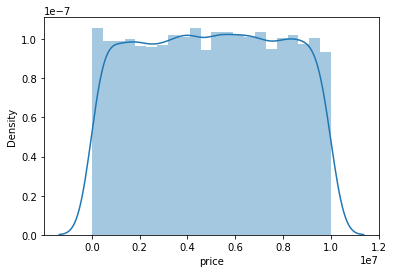

In [ ]:
sns.distplot(df['price'])

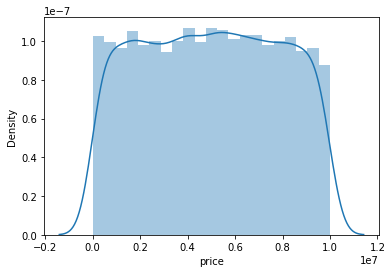

In [ ]:
sns.distplot(y_train)

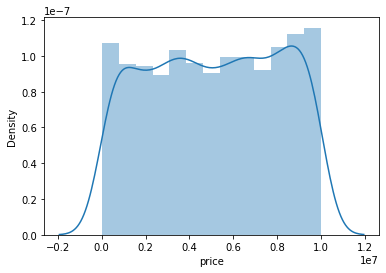

In [ ]:
sns.distplot(y_test)

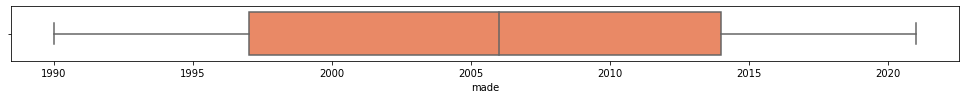

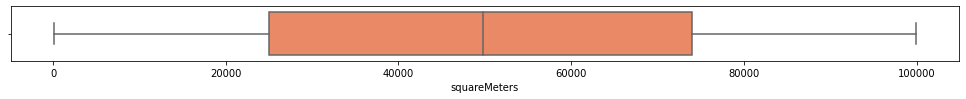

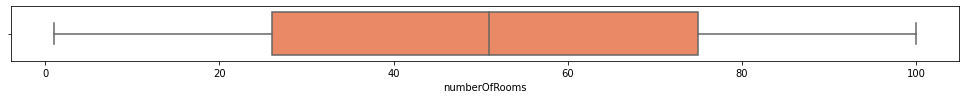

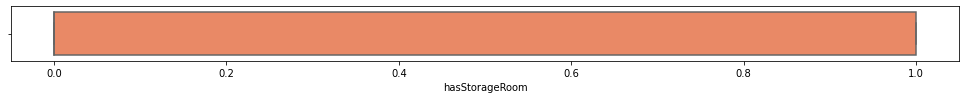

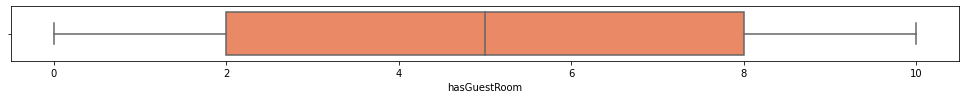

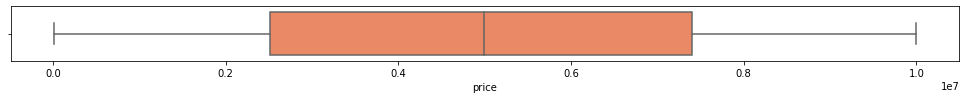

In [ ]:
# Cek outlier Box Plot
for column in df_train:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_train, x=column,color='coral')

In [ ]:
y_train.head()

0    8158198.0
1    7878473.1
2    7816750.0
3    1577602.7
4     322180.4
Name: price, dtype: float64

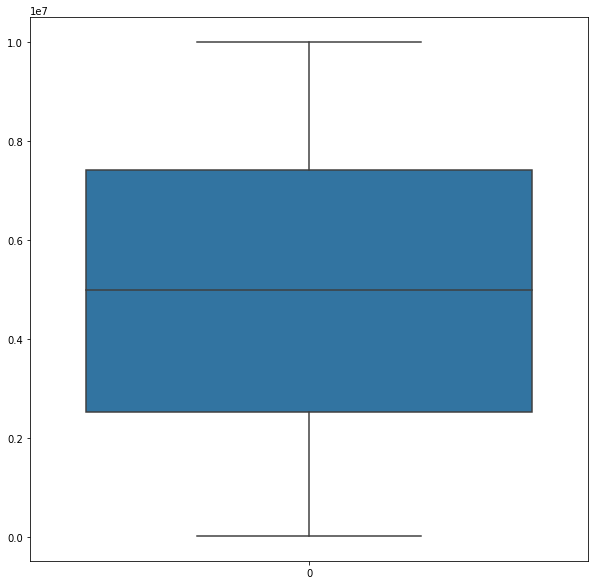

In [ ]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=y_train)

Data tidak memiliki outlier

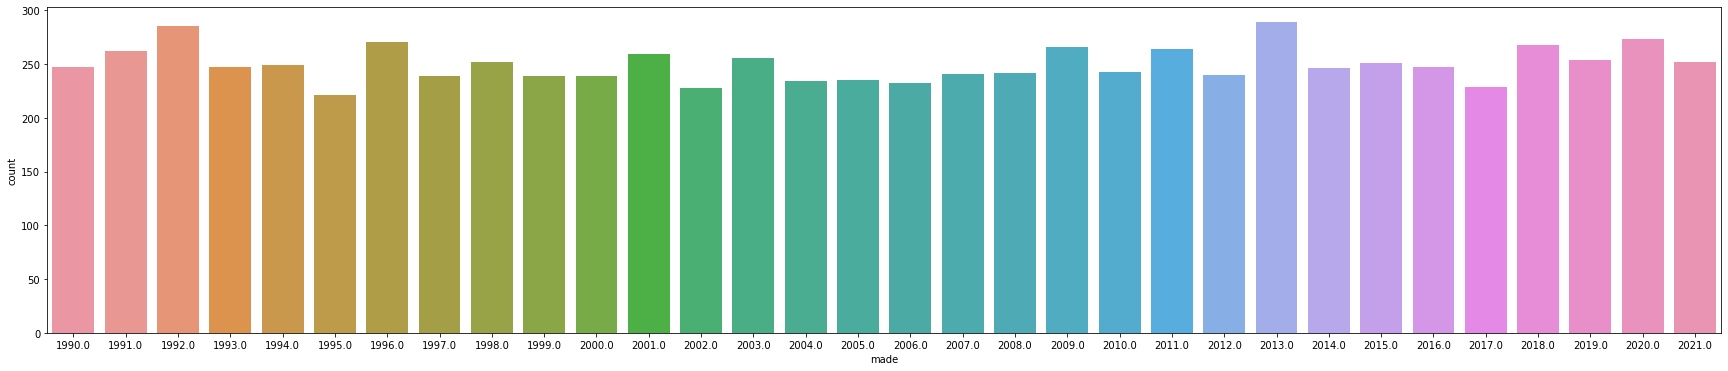

In [ ]:
# Observe imbalance data here
plt.figure(figsize=(30,6))
sns.countplot(X_train.made);

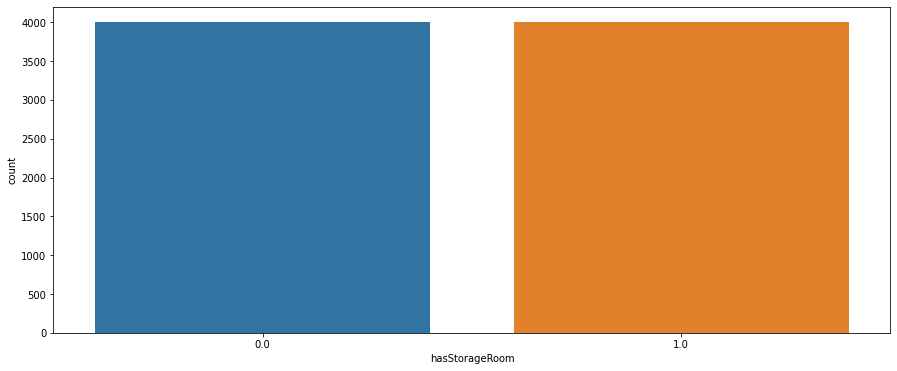

In [ ]:
# Observe imbalance data here
plt.figure(figsize=(15,6))
sns.countplot(X_train.hasStorageRoom);

<Figure size 720x576 with 0 Axes>

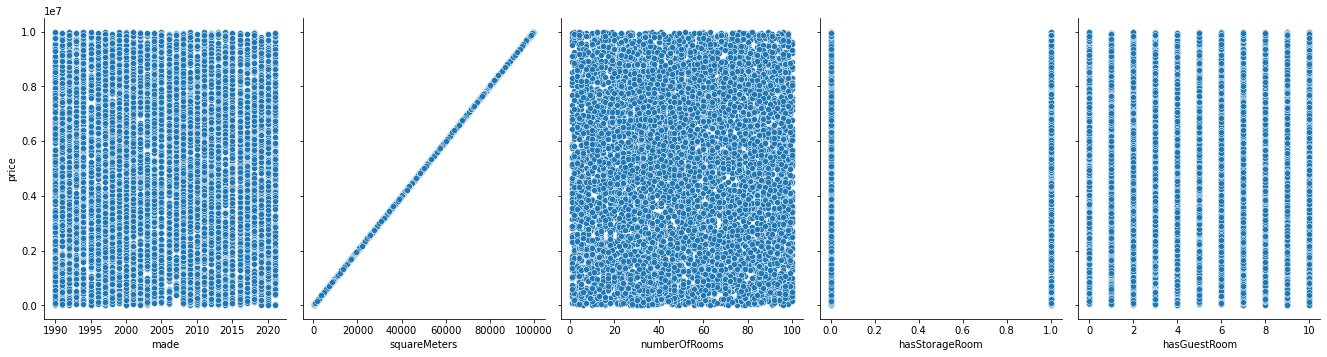

In [ ]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df_train, x_vars=['made', 'squareMeters', 'numberOfRooms', 'hasStorageRoom', 'hasGuestRoom'], y_vars=['price'], size=5, aspect=0.75)

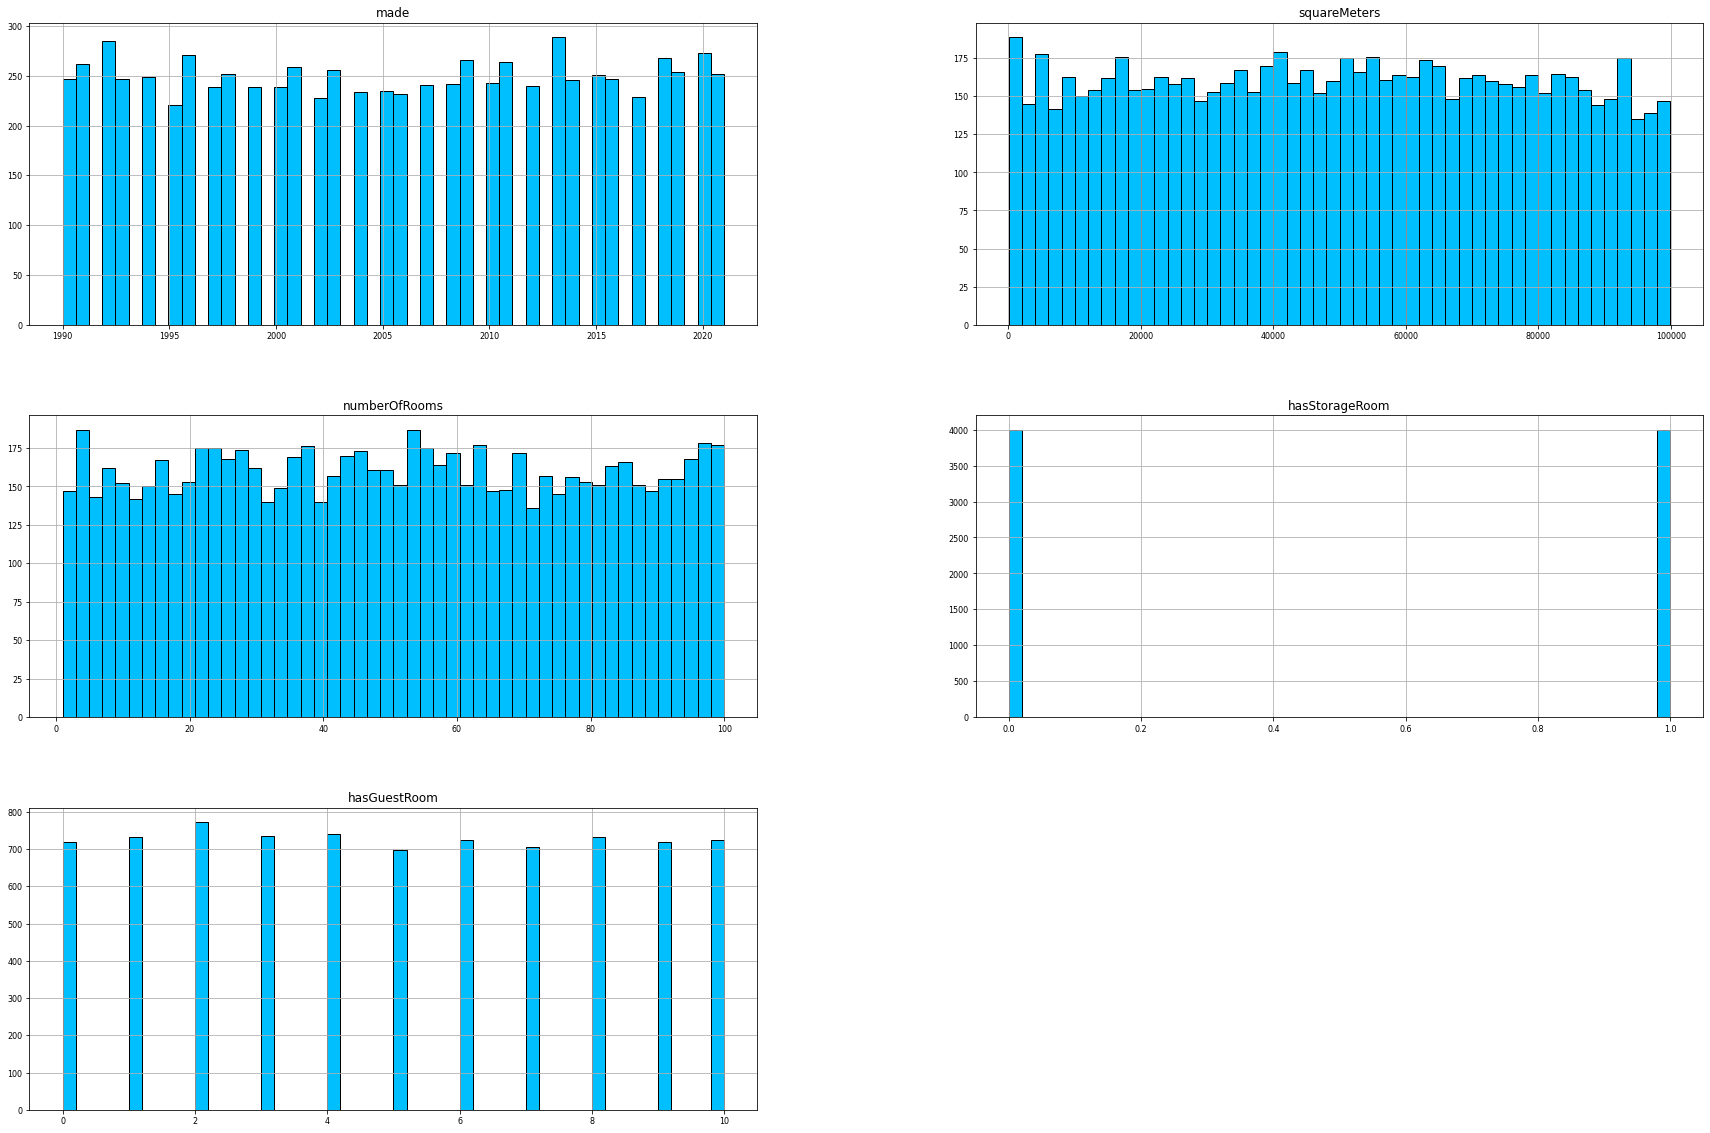

In [ ]:
fig_ = X_train.hist(figsize=(30, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

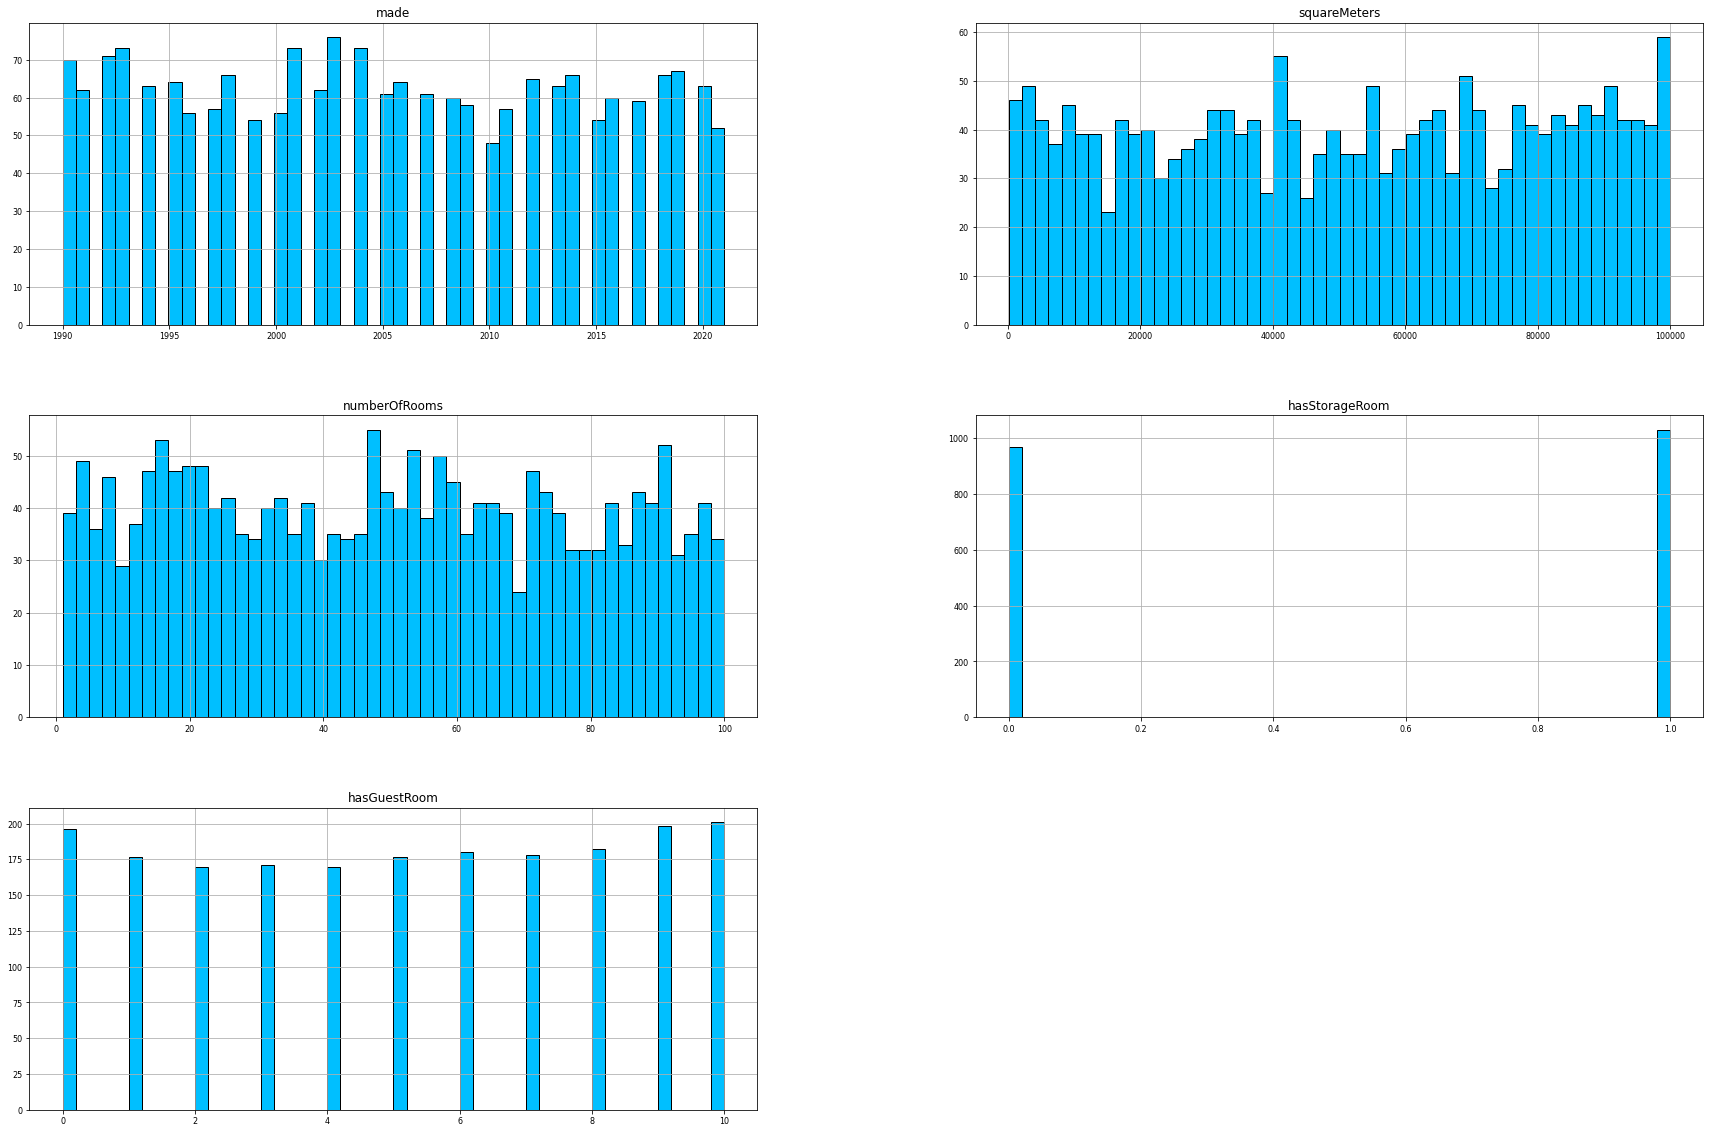

In [ ]:
fig_ = X_test.hist(figsize=(30, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

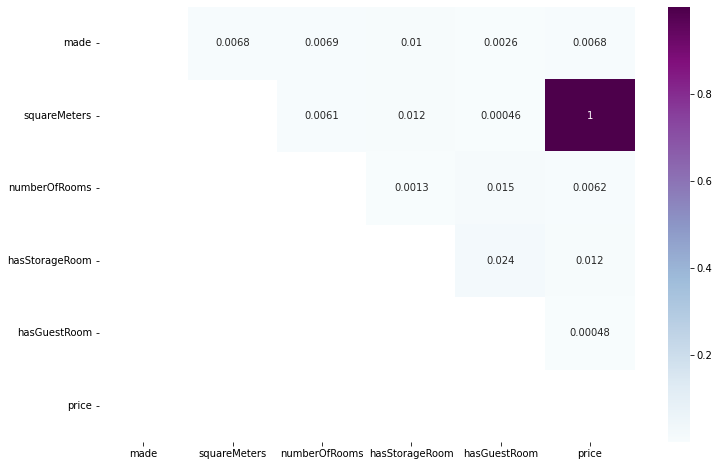

In [ ]:
# Create correlation matrix
corr_matrix = df_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(12,8))
sns.heatmap(upper, annot=True, cmap='BuPu')

In [ ]:
df_train.head()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,1990.0,81531.0,57.0,1.0,2.0,8158198.0
1,1991.0,78731.0,88.0,0.0,3.0,7878473.1
2,1990.0,78004.0,71.0,1.0,6.0,7816750.0
3,2007.0,15727.0,25.0,1.0,8.0,1577602.7
4,2004.0,3190.0,59.0,0.0,5.0,322180.4


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   made            8000 non-null   float64
 1   squareMeters    8000 non-null   float64
 2   numberOfRooms   8000 non-null   float64
 3   hasStorageRoom  8000 non-null   float64
 4   hasGuestRoom    8000 non-null   float64
 5   price           8000 non-null   float64
dtypes: float64(6)
memory usage: 375.1 KB


#Backward Stepwise Regression is a stepwise regression approach that begins with a full (saturated) model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : hasStorageRoom, 0.8249395203974921 
worst_feature : made, 0.6853232471368815 
worst_feature : hasGuestRoom, 0.09252651936600696 
worst_feature : numberOfRooms, 0.06319839533803392 

Selected Features:
['squareMeters']


In [ ]:
# Keep the selected features only
X_train_selc = X_train.loc[:, Selected_Features[0]]
X_test_selc = X_test.loc[:, Selected_Features[0]]

In [ ]:
X_train_selc

,squareMeters
0,81531.0
1,78731.0
2,78004.0
3,15727.0
4,3190.0
...,...
7995,19387.0
7996,92417.0
7997,98710.0
7998,17051.0


In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

# Training for X_train

In [ ]:
# Define regression models
linear=LinearRegression()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
dtr = DecisionTreeRegressor()
rdf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR( kernel='linear')
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [linear,ridge, lasso, elastic,dtr, rdf,gbr, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: LinearRegression
R²: 0.9999987921640247
RMSE: 3252.5590916224496

- Regressor: Ridge
R²: 0.999998792164046
RMSE: 3252.559062861831

- Regressor: Lasso
R²: 0.999998792164035
RMSE: 3252.5590777166826

- Regressor: ElasticNet
R²: 0.9999987921641136
RMSE: 3252.5589718846404

- Regressor: DecisionTreeRegressor
R²: 0.9999967514471069
RMSE: 5334.161815427536

- Regressor: RandomForestRegressor
R²: 0.9999981190698336
RMSE: 4058.8925158496045

- Regressor: GradientBoostingRegressor
R²: 0.9999553394642504
RMSE: 19778.036738553998

[02:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9999542081962578
RMSE: 20026.96276510589

- Regressor: LGBMRegressor
R²: 0.9999813868642284
RMSE: 12768.238537718287



# Training for X_train_selc

In [ ]:
# Define regression models
linear=LinearRegression()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
dtr = DecisionTreeRegressor()
rdf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR( kernel='linear')
xgboost = XGBRegressor()
lgbm = LGBMRegressor()


# Train models on X_train and y_train
for regr in [linear,ridge, lasso, elastic,dtr, rdf,gbr, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train_selc, y_train)
    y_pred = regr.predict(X_test_selc)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: LinearRegression
R²: 0.9999987929500633
RMSE: 3251.500564761957

- Regressor: Ridge
R²: 0.9999987929500633
RMSE: 3251.5005647663047

- Regressor: Lasso
R²: 0.9999987929500633
RMSE: 3251.5005647622925

- Regressor: ElasticNet
R²: 0.9999987929500633
RMSE: 3251.50056477952

- Regressor: DecisionTreeRegressor
R²: 0.9999974340465554
RMSE: 4740.734144629135

- Regressor: RandomForestRegressor
R²: 0.9999981165861205
RMSE: 4061.5714560629926

- Regressor: GradientBoostingRegressor
R²: 0.9999555230060745
RMSE: 19737.35390501474

[02:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9999538534514933
RMSE: 20104.386597041444

- Regressor: LGBMRegressor
R²: 0.9999816726640318
RMSE: 12669.832856139454



#X_Train_std

In [ ]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train_selc)
X_train_std = std_scale.transform(X_train_selc)
X_test_std = std_scale.transform(X_test_selc)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train_std = pd.DataFrame(X_train_std, columns=X_train_selc.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_test_selc.columns)

y_train_std = pd.DataFrame(y_train)
y_train_std = y_train_std.reset_index().drop("index", axis=1)

y_test_std = pd.DataFrame(y_test)
y_test_std = y_test_std.reset_index().drop("index", axis=1)

In [ ]:
# Define regression models
linear=LinearRegression()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
dtr = DecisionTreeRegressor()
rdf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lsvr =LinearSVR()
svr = SVR( kernel='linear')
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [linear,ridge, lasso, elastic,dtr, rdf,gbr,lsvr,svr, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train_std, y_train_std)
    y_pred = regr.predict(X_test_std)
    # Print the defined metrics above for each classifier
    print_score(y_test_std, y_pred)

- Regressor: LinearRegression
R²: 0.9999987929500633
RMSE: 3251.500564761941

- Regressor: Ridge
R²: 0.9999987746554571
RMSE: 3276.0485216116977

- Regressor: Lasso
R²: 0.999998792950056
RMSE: 3251.5005747076884

- Regressor: ElasticNet
R²: 0.9999985320531553
RMSE: 3585.72005220373

- Regressor: DecisionTreeRegressor
R²: 0.9999974264043786
RMSE: 4747.788558157106

- Regressor: RandomForestRegressor
R²: 0.9999980984806913
RMSE: 4081.0468913046943

- Regressor: GradientBoostingRegressor
R²: 0.9999555230060745
RMSE: 19737.35390501474

- Regressor: LinearSVR
R²: -2.9729437133344874
RMSE: 5898986.755745863

- Regressor: SVR
R²: 0.0030902821138633074
RMSE: 2954943.1487844004

[02:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9999538744723135
RMSE: 20099.8070688936

- Regressor: LGBMRegressor
R²: 0.9999822439186086
RMSE: 12470.813330641142



In [ ]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std2 = std_scale.transform(X_train)
X_test_std2 = std_scale.transform(X_test)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train_std2 = pd.DataFrame(X_train_std2, columns=X_train.columns)
X_test_std2 = pd.DataFrame(X_test_std2, columns=X_test.columns)

y_train_std2 = pd.DataFrame(y_train)
y_train_std2 = y_train_std.reset_index().drop("index", axis=1)

y_test_std2 = pd.DataFrame(y_test)
y_test_std2 = y_test_std2.reset_index().drop("index", axis=1)

In [ ]:
# Define regression models
linear=LinearRegression()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
dtr = DecisionTreeRegressor()
rdf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lsvr =LinearSVR()
svr = SVR( kernel='linear')
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [linear,ridge, lasso, elastic,dtr, rdf,gbr,lsvr,svr, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train_std2, y_train_std2)
    y_pred = regr.predict(X_test_std2)
    # Print the defined metrics above for each classifier
    print_score(y_test_std2, y_pred)

- Regressor: LinearRegression
R²: 0.9999987921640247
RMSE: 3252.5590916224805

- Regressor: Ridge
R²: 0.9999987740154169
RMSE: 3276.9040071310433

- Regressor: Lasso
R²: 0.9999987921643364
RMSE: 3252.5586718163736

- Regressor: ElasticNet
R²: 0.9999985316768333
RMSE: 3586.1796391557673

- Regressor: DecisionTreeRegressor
R²: 0.9999967884075411
RMSE: 5303.730276495032

- Regressor: RandomForestRegressor
R²: 0.9999981338787217
RMSE: 4042.882760744281

- Regressor: GradientBoostingRegressor
R²: 0.9999553394642504
RMSE: 19778.036738553943

- Regressor: LinearSVR
R²: -2.9729437133344874
RMSE: 5898986.755745863

- Regressor: SVR
R²: 0.0030889003408518523
RMSE: 2954945.196642499

[02:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9999542291719736
RMSE: 20022.375393966795

- Regressor: LGBMRegressor
R²: 0.999981941076126
RMSE: 12576.712947014845



#Hyperparameter Tuning

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train_selc, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 100000.0}
Best R² (train): 0.9999986900212494


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train_selc, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test_selc)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9999987929497399
RMSE: 3251.5010004265573


In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

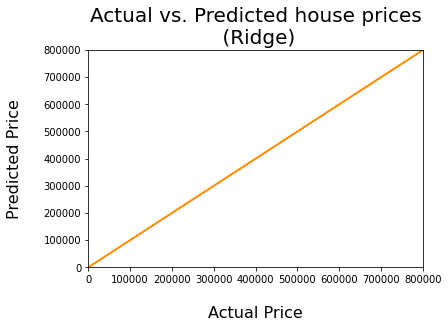

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train_selc, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 5963.623316594637}
Best R² (train): 0.999998690021252


In [ ]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train_selc, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test_selc)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.9999987929485159
RMSE: 3251.5026489964494


In [ ]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

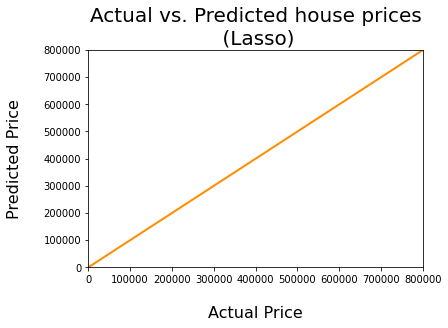

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,1.0,3251.5010
1,Lasso,1.0,3251.5026


#Result

In [ ]:
linear.fit(X_train_selc, y_train)

# Predict on test set
y_result_pred = linear.predict(X_test_selc)

print(f"- {linear.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LinearRegression
R²: 0.9999987929485159
RMSE: 3251.5026489964494


In [ ]:
df_result=X_test_selc.copy()
df_result['price_test']=y_test
df_result['price_pred']=y_result_pred

In [ ]:
df_result

,squareMeters,price_test,price_pred
0,79553.0,7964369.6,7.961696e+06
1,37047.0,3713548.9,3.711128e+06
2,85476.0,8553019.2,8.553992e+06
3,64209.0,6428666.2,6.427308e+06
4,64550.0,6465184.9,6.461408e+06
...,...,...,...
1995,69418.0,6951279.2,6.948204e+06
1996,81453.0,8152737.7,8.151695e+06
1997,19446.0,1947709.8,1.951041e+06
1998,29392.0,2944295.3,2.945634e+06
